In [1]:
from pyspark.streaming.kafka import KafkaUtils
from IPython.display import Image
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import StructType,StructField, StringType,IntegerType

In [2]:
zk_quorum='localhost:2181'
group='sparkgroup'
topic='test'
partition='1'

In [3]:
#conf = SparkConf().setAppName("KafkaSparkStreaming")
#sc = SparkContext(appName)
ssc = StreamingContext(sc, 5)

In [4]:
#Creating Kafka direct stream
# directKafkaStream = KafkaUtils.createDirectStream(ssc, [topic], {"metadata.broker.list": brokers})
dks = KafkaUtils.createDirectStream(ssc, ["test"], {"metadata.broker.list":"localhost:9092"})

In [5]:
counts = dks.pprint()
print counts

None


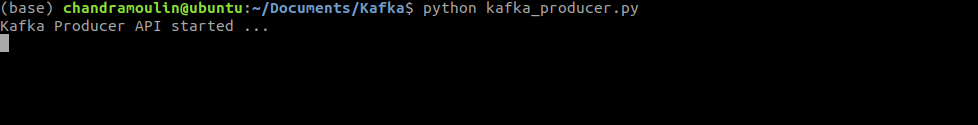

In [6]:
#Invoke kafka_producer_api.py to generate messages and push to topic
Image('/home/chandramoulin/Pictures/Screenshot from 2021-05-08 01-01-51.png')

In [7]:
lines = dks.map(lambda x: x[1])

In [8]:
#Saving the contents from topic to HDFS location
lines.saveAsTextFiles('hdfs://localhost:50000/data/kafka/direct')

In [9]:
ssc.start()

In [ ]:
ssc.awaitTermination()

-------------------------------------------
Time: 2021-05-08 22:57:45
-------------------------------------------
(None, u'1,Brandon Buckner,avil,female,525\n')
(None, u'2,Veda Hopkins,avil,male,633\n')
(None, u'3,Zia Underwood,paracetamol,male,980\n')

-------------------------------------------
Time: 2021-05-08 22:57:50
-------------------------------------------
(None, u'4,Austin Mayer,paracetamol,female,338\n')

-------------------------------------------
Time: 2021-05-08 22:57:55
-------------------------------------------
(None, u'5,Mara Higgins,avil,female,153\n')

-------------------------------------------
Time: 2021-05-08 22:58:00
-------------------------------------------
(None, u'6,Sybill Crosby,avil,male,193\n')

-------------------------------------------
Time: 2021-05-08 22:58:05
-------------------------------------------
(None, u'7,Tyler Rosales,paracetamol,male,778\n')

-------------------------------------------
Time: 2021-05-08 22:58:10
----------------------------

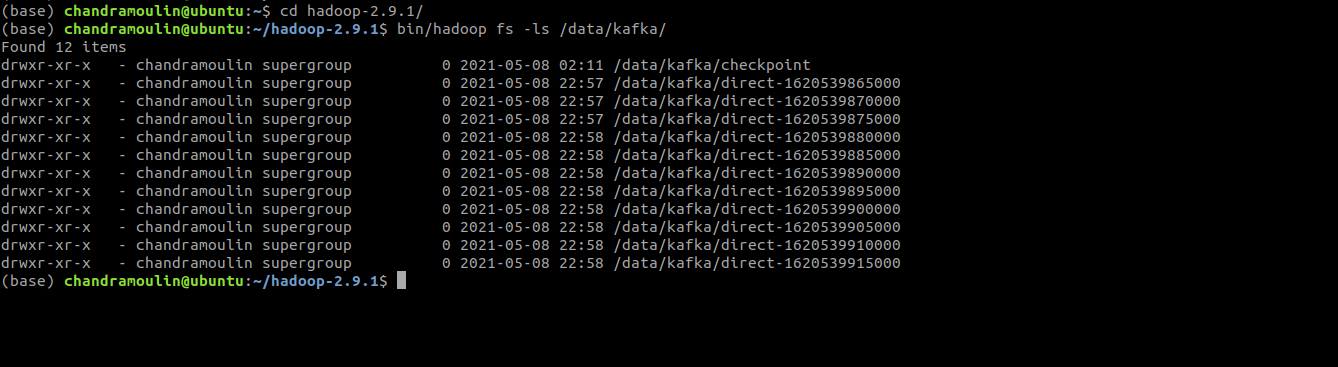

In [32]:
#bin/hadoop fs -ls /data/kafka/ - data present in HDFS 
Image('/home/chandramoulin/Pictures/Screenshot from 2021-05-09 02-26-27.png')

In [29]:
txt_rdd=sc.textFile('hdfs://localhost:50000/data/kafka/direct*')

In [30]:
txt_rdd.take(3)

[u'1,Brandon Buckner,avil,female,525', u'', u'2,Veda Hopkins,avil,male,633']

In [15]:
txt_rdd1=txt_rdd.map(lambda x:x.encode("ascii", "ignore").split(','))

In [33]:
txt_rdd1.take(3)

[['1', 'Brandon Buckner', 'avil', 'female', '525'],
 [''],
 ['2', 'Veda Hopkins', 'avil', 'male', '633']]

In [22]:
#filtering non empty values 
txt_rdd2=txt_rdd1.filter(lambda x: len(x)>1)

In [26]:
txt_rdd2.take(2)

[['1', 'Brandon Buckner', 'avil', 'female', '525'],
 ['2', 'Veda Hopkins', 'avil', 'male', '633']]

In [23]:
#schema creation
schema = StructType([       
    StructField('id', StringType(), True),
    StructField('name', StringType(), True),
    StructField('detail', StringType(), True),
    StructField('gender', StringType(), True),
    StructField('amount', StringType(), True)
])


In [27]:
#dataframe creation
df1 = spark.createDataFrame(txt_rdd2, schema = schema)

In [28]:
df1.show(truncate=False)

+---+---------------+-----------+------+------+
|id |name           |detail     |gender|amount|
+---+---------------+-----------+------+------+
|1  |Brandon Buckner|avil       |female|525   |
|2  |Veda Hopkins   |avil       |male  |633   |
|3  |Zia Underwood  |paracetamol|male  |980   |
|4  |Austin Mayer   |paracetamol|female|338   |
|5  |Mara Higgins   |avil       |female|153   |
|6  |Sybill Crosby  |avil       |male  |193   |
|7  |Tyler Rosales  |paracetamol|male  |778   |
|8  |Ivan Hale      |avil       |female|454   |
|9  |Alika Gilmore  |paracetamol|female|833   |
|10 |Len Burgess    |metacin    |male  |325   |
+---+---------------+-----------+------+------+

